# PRACTICAL NO. 1

## Implementations of 16 Qubit Random Number Generator

In [1]:
!pip install qiskit qiskit_aer Matplotlib

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

In [3]:
qc = QuantumCircuit(16,16)

In [4]:
qc.h(range(16))

In [5]:
qc.measure(range(16), range(16))

In [6]:
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1).result()

In [7]:
counts = result.get_counts(qc)
random_bits = list(counts.keys())[0]

In [8]:
print("Random 16-bit binary number:", random_bits)
print("Decimal value:", int(random_bits, 2))

Random 16-bit binary number: 0110101110010011
Decimal value: 27539


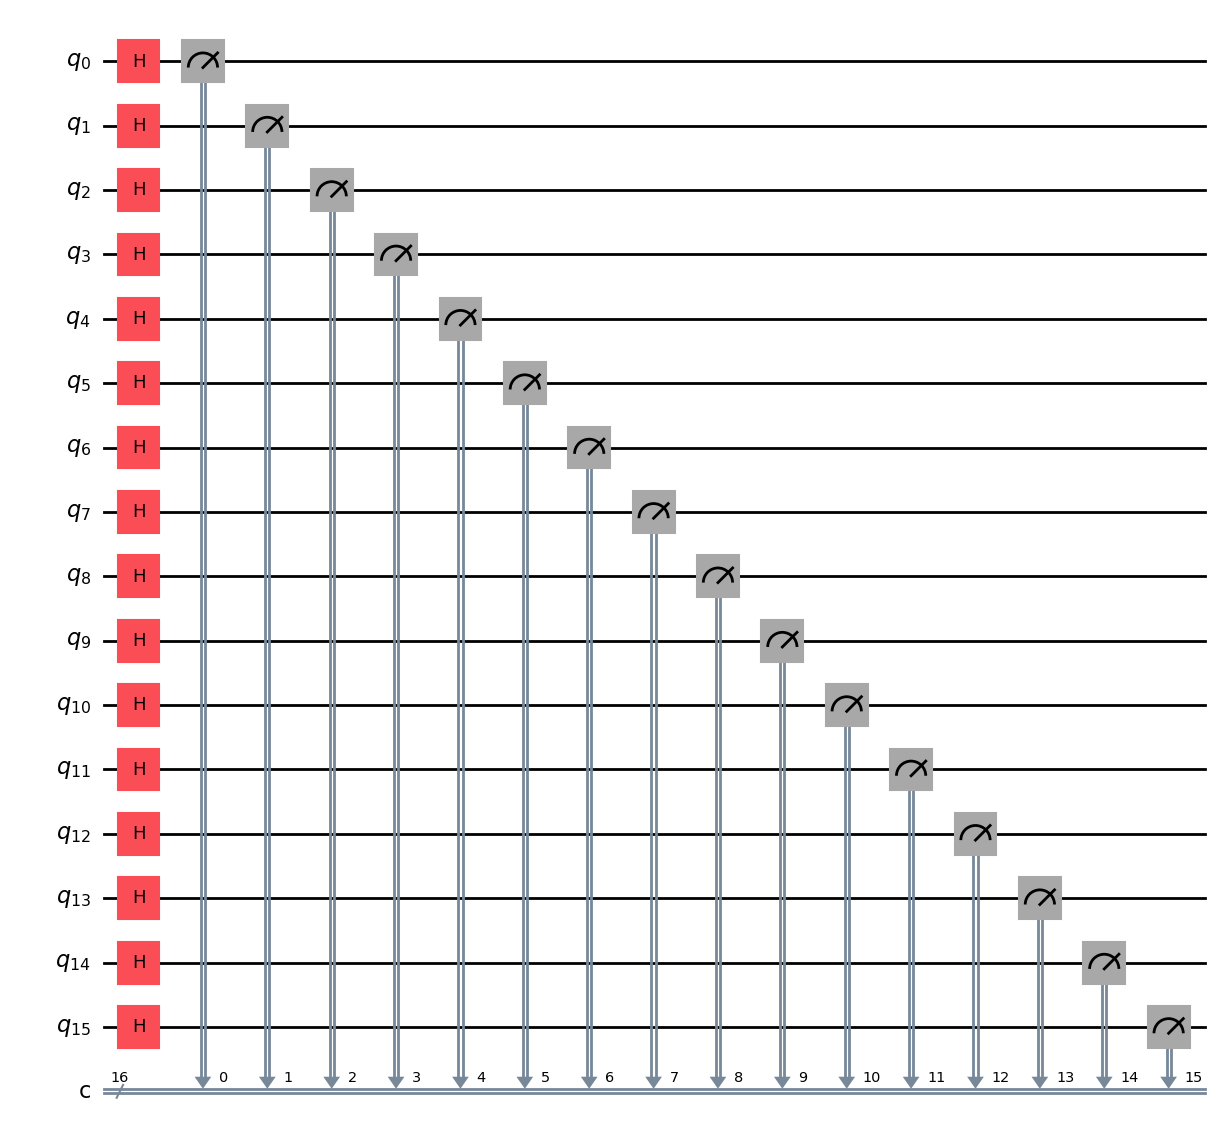

In [9]:
from qiskit.visualization import circuit_drawer
qc.draw('mpl')

In [ ]:
# Yes, I understand the provided code. It implements a **16-qubit Quantum Random Number Generator (QRNG)** 
# using Qiskit and the Aer simulator.

# Here is a detailed explanation of the code, designed to prepare you for potential questions in your practical exam.

# ---

# ## 💻 Quantum Random Number Generator (QRNG) Explanation

# This code demonstrates one of the simplest and most fundamental applications of quantum computing: generating genuinely random numbers.

# ### 1. The Core Idea: Quantum Randomness

# The key principle is that a quantum system in a **superposition** state does not have a definite value until it is measured. 
# When measured, it collapses to one of its possible classical states with a probability determined by its quantum state. 
# Since this collapse is fundamentally **non-deterministic** (governed by the laws of quantum mechanics), the output is considered 
#     **truly random**, unlike classical pseudo-random number generators, which are deterministic algorithms.

# ### 2. Code Breakdown

# The code uses the **Qiskit** quantum computing framework and follows these steps:

# | Code Section | Purpose | Explanation for Exam |
# | :--- | :--- | :--- |
# | `from qiskit import ...` | **Setup and Imports** | Imports the necessary classes: `QuantumCircuit` for building the circuit, `transpile` 
# for optimizing it, and `AerSimulator` to simulate the quantum computer locally. |
# | `qc = QuantumCircuit(16, 16)` | **Circuit Initialization** | Creates a quantum circuit named `qc` with **16 quantum bits (qubits)** and 
# **16 classical bits**. The 16 qubits store the quantum state, and the 16 classical bits will record the measurement result (the random number). |
# | `qc.h(range(16))` | **Creating Superposition** | Applies a **Hadamard gate** ($\text{H}$) to all 16 qubits. The $\text{H}$-gate puts a 
# qubit initially in state $|0\rangle$ into an equal **superposition** of $|0\rangle$ and $|1\rangle$, represented as $\frac{1}{\sqrt{2}}
# (|0\rangle + |1\rangle)$. *This is the step that introduces true quantum randomness.* |
# | `qc.measure(range(16), range(16))` | **Measurement** | Measures all 16 qubits (from index 0 to 15) and stores the results in the 16 classical bits 
# (also from index 0 to 15). The act of measurement **collapses** the superposition, forcing each qubit to randomly become either a **0** or a **1** 
# with equal probability (50/50). |
# | `simulator = AerSimulator()` | **Backend Selection** | Chooses the `AerSimulator` as the backend to run the circuit. 
# This simulates how a real quantum computer would execute the circuit. |
# | `compiled_circuit = transpile(qc, simulator)` | **Compilation** | Prepares the circuit to run on the selected backend (the simulator). 
# For simple circuits like this, it might not change much, but for real quantum hardware, this step is vital for optimization. |
# | `result = simulator.run(..., shots=1).result()` | **Execution** | Runs the compiled circuit on the simulator with `shots=1`. 
# This means the quantum circuit is executed **only once** to obtain a single, 16-bit random result. |
# | `counts = result.get_counts(qc)` | **Retrieving Result** | Gets the measurement results, stored in a dictionary called `counts`. 
# Since we used `shots=1`, this dictionary will contain only one key-value pair, where the **key** is the 16-bit binary string (the random number) 
# and the value is `1` (because it was measured once). |
# | `random_bits = list(counts.keys())[0]` | **Extracting Binary String** | Extracts the single key from the `counts` dictionary, which is the 
# **16-bit random binary number**. |
# | `print("Decimal value:", int(random_bits, 2))` | **Conversion** | Converts the 16-bit binary string (`random_bits`) into its integer 
# **decimal** equivalent for a more human-readable result. |

# ---

# ## 🧠 Potential Exam Questions and Answers

# ### Q1: What is the purpose of the Hadamard ($\text{H}$) gate in this circuit?

# * **Answer:** The $\text{H}$-gate is crucial because it creates a **quantum superposition**. 
# By applying it to a qubit initially in $|0\rangle$, it transforms the state to $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$. 
# This means the qubit has an equal probability of being measured as **0** or **1**, which is the source of the quantum randomness.

# ### Q2: Why did you use 16 qubits and 16 classical bits?

# * **Answer:** The number 16 determines the **length** of the random number generated. Using 16 qubits and 
# 16 classical bits allows the circuit to generate a random number of $2^{16} - 1 = 65,535$ possible values, which is a **16-bit binary number**.

# ### Q3: Why is `shots=1` used when running the simulator?

# * **Answer:** The `shots` parameter specifies how many times the quantum circuit should be run.
#     * For a QRNG, we are interested in getting a **single** genuinely random number from the measurement collapse.
#     * Running it multiple times (`shots > 1`) would produce a sequence of random numbers. 
#     Using `shots=1` is the most direct way to generate one random 16-bit string.

# ### Q4: How is this QRNG different from a classical one?

# * **Answer:**
#     * **Classical RNGs** (specifically, **Pseudo-Random Number Generators or PRNGs**) use deterministic mathematical algorithms. 
#     They produce a sequence of numbers that *appear* random, but if you know the **initial seed** and the algorithm, the sequence 
#      is completely predictable.
#     * **Quantum RNGs (QRNGs)**, like the one here, rely on the inherent, fundamental **non-determinism** of quantum mechanics 
#      (the wave function collapse upon measurement). The output is truly unpredictable and therefore considered **true random** 
#                                 (or physical random) number generation.

# ### Q5: If you run this code again, will you get the same result? Why or why not?

# * **Answer:** No, you will almost certainly get a **different** 16-bit binary number. This is the entire point of the QRNG. 
#     The **measurement** step collapses the 16-qubit superposition state, and due to quantum randomness, 
#    the resulting 16-bit string is randomly selected from the $2^{16}$ possible outcomes. Each run generates a new, independent random result.

# ### Q6: What would happen if you skipped the $\text{H}$-gate step?

# * **Answer:** If the $\text{H}$-gates were skipped, all 16 qubits would remain in their initial state of $|0\rangle$. 
#     When measured, all 16 qubits would collapse to **0** with 100% certainty. 
#     The resulting random number would always be the 16-bit binary string **"0000000000000000"** (decimal 0), which is not random at all.